In [1]:
# Install some more libs
! sudo pip install pandas
! sudo pip install matplotlib
! sudo apt-get -y install python3-tk

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-tk is already the newest version.
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [2]:
# import required libs
from revscoring.dependencies import solve
from revscoring.features import wikitext
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Load dataset
df = pd.read_csv("enwiki.draft_quality.75_not_OK_sample.censored.tsv", sep="\t")
df.head()

,page_title,rev_id,creation_timestamp,archived,draft_quality,censored_text
0,Government_Achuthan_girls_hss,688249460,20151030165831,1,spam,125 years ago APPU NEDUNGADI STARTED THIS SCH...
1,Spiromax_EDMS,731688963,20160726220726,1,spam,Spiromax is a British technology media and com...
2,Steph_Curry_UA_2,693824273,20151205035603,1,spam,The Steph Curry UA two Shoes are a hot-selling...
3,Valletta_Cruise_Port,722151405,20160526085302,1,spam,''Valletta Cruise Port plc''' is a private com...
4,RWG_Mobile,731355950,20160724204124,1,spam,[[File:RWGmobile.png|thumb|RWG Mobile logo]]\n...


### Character features

In [4]:
# The number of characters
chars = lambda x:list(solve([ wikitext.revision.chars], cache={'datasource.revision.text': x}))[0]
df["chars"] = df["censored_text"].apply(chars)

# whitespace_chars
whitespace_chars = lambda x:list(solve([ wikitext.revision.whitespace_chars], cache={'datasource.revision.text': x}))[0]
df["whitespace_chars"] = df["censored_text"].apply(whitespace_chars)

# The number of wikitext markup characters
markup_chars = lambda x:list(solve([ wikitext.revision.markup_chars], cache={'datasource.revision.text': x}))[0]
df["markup_chars"] = df["censored_text"].apply(markup_chars)

# The number of Chinese/Japanese/Korean characters
cjk_chars = lambda x:list(solve([ wikitext.revision.cjk_chars], cache={'datasource.revision.text': x}))[0]
df["cjk_chars"] = df["censored_text"].apply(cjk_chars)

# The number of HTML entity characters
entity_chars = lambda x:list(solve([ wikitext.revision.entity_chars], cache={'datasource.revision.text': x}))[0]
df["entity_chars"] = df["censored_text"].apply(entity_chars)

# The number of URL characters
url_chars = lambda x:list(solve([ wikitext.revision.url_chars], cache={'datasource.revision.text': x}))[0]
df["url_chars"] = df["censored_text"].apply(url_chars)

# The number of word characters
word_chars = lambda x:list(solve([ wikitext.revision.word_chars], cache={'datasource.revision.text': x}))[0]
df["word_chars"] = df["censored_text"].apply(word_chars)

# The number of UPPERCASE WORD characters
uppercase_word_chars = lambda x:list(solve([ wikitext.revision.uppercase_word_chars], cache={'datasource.revision.text': x}))[0]
df["uppercase_word_chars"] = df["censored_text"].apply(uppercase_word_chars)

# The number of punctuation characters
punctuation_chars = lambda x:list(solve([ wikitext.revision.punctuation_chars], cache={'datasource.revision.text': x}))[0]
df["punctuation_chars"] = df["censored_text"].apply(punctuation_chars)

# The number of break characters
break_chars = lambda x:list(solve([ wikitext.revision.break_chars], cache={'datasource.revision.text': x}))[0]
df["break_chars"] = df["censored_text"].apply(break_chars)

# The length of the most longest character repetition
longest_repeated_char = lambda x:list(solve([ wikitext.revision.longest_repeated_char], cache={'datasource.revision.text': x}))[0]
df["longest_repeated_char"] = df["censored_text"].apply(longest_repeated_char)

### Tokenized features 

In [5]:
# The number of tokens
tokens = lambda x:list(solve([ wikitext.revision.tokens], cache={'datasource.revision.text': x}))[0]
df["tokens"] = df["censored_text"].apply(tokens)

# The number of number tokens
numbers = lambda x:list(solve([ wikitext.revision.numbers], cache={'datasource.revision.text': x}))[0]
df["numbers"] = df["censored_text"].apply(numbers)

# The number of whitespace tokens
whitespaces = lambda x:list(solve([ wikitext.revision.whitespaces], cache={'datasource.revision.text': x}))[0]
df["whitespaces"] = df["censored_text"].apply(whitespaces)

# The number of markup tokens
markups = lambda x:list(solve([ wikitext.revision.markups], cache={'datasource.revision.text': x}))[0]
df["markups"] = df["censored_text"].apply(markups)

# The number of Chinese/Japanese/Korean tokens
cjks = lambda x:list(solve([ wikitext.revision.cjks], cache={'datasource.revision.text': x}))[0]
df["cjks"] = df["censored_text"].apply(cjks)

# The number of HTML entity tokens
entities = lambda x:list(solve([ wikitext.revision.entities], cache={'datasource.revision.text': x}))[0]
df["entities"] = df["censored_text"].apply(entities)

# The number of URL tokens
urls = lambda x:list(solve([ wikitext.revision.urls], cache={'datasource.revision.text': x}))[0]
df["urls"] = df["censored_text"].apply(urls)

# The number of word tokens
words = lambda x:list(solve([ wikitext.revision.words], cache={'datasource.revision.text': x}))[0]
df["words"] = df["censored_text"].apply(words)

# The number of UPPERCASE word tokens
uppercase_words = lambda x:list(solve([ wikitext.revision.uppercase_words], cache={'datasource.revision.text': x}))[0]
df["uppercase_words"] = df["censored_text"].apply(uppercase_words)

# The number of punctuation tokens
punctuations = lambda x:list(solve([ wikitext.revision.punctuations], cache={'datasource.revision.text': x}))[0]
df["punctuations"] = df["censored_text"].apply(punctuations)

# The number of break tokens
breaks = lambda x:list(solve([ wikitext.revision.breaks], cache={'datasource.revision.text': x}))[0]
df["breaks"] = df["censored_text"].apply(breaks)

# The length of the longest token
longest_token = lambda x:list(solve([ wikitext.revision.longest_token], cache={'datasource.revision.text': x}))[0]
df["longest_token"] = df["censored_text"].apply(longest_token)

# The length of the longest word-token
longest_word = lambda x:list(solve([ wikitext.revision.longest_word], cache={'datasource.revision.text': x}))[0]
df["longest_word"] = df["censored_text"].apply(longest_word)

### Parsed features

In [6]:
# The number of characters of viewable content (no markup or templates)
content_chars = lambda x:list(solve([ wikitext.revision.content_chars], cache={'datasource.revision.text': x}))[0]
df["content_chars"] = df["censored_text"].apply(content_chars)

# The number of headings
headings = lambda x:list(solve([ wikitext.revision.headings], cache={'datasource.revision.text': x}))[0]
df["headings"] = df["censored_text"].apply(headings)

# The number of external links
external_links = lambda x:list(solve([ wikitext.revision.external_links], cache={'datasource.revision.text': x}))[0]
df["external_links"] = df["censored_text"].apply(external_links)

# The number of wikilinks (internal to other pages in the wiki)
wikilinks = lambda x:list(solve([ wikitext.revision.wikilinks], cache={'datasource.revision.text': x}))[0]
df["wikilinks"] = df["censored_text"].apply(wikilinks)

# The number of HTML tags
tags = lambda x:list(solve([ wikitext.revision.tags], cache={'datasource.revision.text': x}))[0]
df["tags"] = df["censored_text"].apply(tags)

# The number of <ref> tags
ref_tags = lambda x:list(solve([ wikitext.revision.ref_tags], cache={'datasource.revision.text': x}))[0]
df["ref_tags"] = df["censored_text"].apply(ref_tags)

# The number of templates
templates = lambda x:list(solve([ wikitext.revision.templates], cache={'datasource.revision.text': x}))[0]
df["templates"] = df["censored_text"].apply(templates)

### Custom features

In [7]:
df["whitespace_chars_norm"] = df["whitespace_chars"] / df["chars"]
df["markup_chars_norm"] = df["markup_chars"] / df["chars"]
df["cjk_chars_norm"] = df["cjk_chars"] / df["chars"]
df["entity_chars_norm"] = df["entity_chars"] / df["chars"]
df["url_chars_norm"] = df["url_chars"] / df["chars"]
df["word_chars_norm"] = df["word_chars"] / df["chars"]
df["uppercase_word_chars_norm"] = df["uppercase_word_chars"] / df["chars"]
df["punctuation_chars_norm"] = df["punctuation_chars"] / df["chars"]
df["break_chars_norm"] = df["break_chars"] / df["chars"]
df["longest_repeated_char_norm"] = df["longest_repeated_char"] / df["chars"]

In [8]:
df["numbers_norm"] = df["numbers"] / df["tokens"]
df["whitespaces_norm"] = df["whitespaces"] / df["tokens"]
df["markups_norm"] = df["markups"] / df["tokens"]
df["cjks_norm"] = df["cjks"] / df["tokens"]
df["entities_norm"] = df["entities"] / df["tokens"]
df["urls_norm"] = df["urls"] / df["tokens"]
df["words_norm"] = df["words"] / df["tokens"]
df["uppercase_words_norm"] = df["uppercase_words"] / df["tokens"]
df["punctuations_norm"] = df["punctuations"] / df["tokens"]
df["breaks_norm"] = df["breaks"] / df["tokens"]
df["longest_token_norm"] = df["longest_token"] / df["tokens"]

In [9]:
### Recap the columns in the main dataframe
df.columns

Index(['page_title', 'rev_id', 'creation_timestamp', 'archived',
       'draft_quality', 'censored_text', 'chars', 'whitespace_chars',
       'markup_chars', 'cjk_chars', 'entity_chars', 'url_chars', 'word_chars',
       'uppercase_word_chars', 'punctuation_chars', 'break_chars',
       'longest_repeated_char', 'tokens', 'numbers', 'whitespaces', 'markups',
       'cjks', 'entities', 'urls', 'words', 'uppercase_words', 'punctuations',
       'breaks', 'longest_token', 'longest_word', 'content_chars', 'headings',
       'external_links', 'wikilinks', 'tags', 'ref_tags', 'templates',
       'whitespace_chars_norm', 'markup_chars_norm', 'cjk_chars_norm',
       'entity_chars_norm', 'url_chars_norm', 'word_chars_norm',
       'uppercase_word_chars_norm', 'punctuation_chars_norm',
       'break_chars_norm', 'longest_repeated_char_norm', 'numbers_norm',
       'whitespaces_norm', 'markups_norm', 'cjks_norm', 'entities_norm',
       'urls_norm', 'words_norm', 'uppercase_words_norm', 'punctuat

### Feature selection 

In [10]:
### We consider only the features we've defined above 
features = df.columns[6:] 
### We consider only the features we've defined above 
target = df.columns[4]

In [11]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 4 attributes
rfe = RFE(model, 4)
rfe = rfe.fit(df[features], df[target])
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
features[rfe.support_]

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False  True False False False False False False
 False False False False  True False  True False False False False False
 False False False False]
[28 22 19 29 43 27 24 25  7 47  8 26 17 20 11 33 44  4 21  5  6 45 31 13 35
 49  1 10 18  1  9 12 16 40 48 32  3 34 30 46  1 36  1 15 39 42 38  2 37 23
 41 14]


Index(['external_links', 'ref_tags', 'longest_repeated_char_norm',
       'whitespaces_norm'],
      dtype='object')

In [12]:
rfe.score(df[features], df[target])

0.54666666666666663

In [13]:
# Feature Importance
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(df[features], df[target])
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.02242708  0.02013383  0.00327857  0.003       0.          0.01405852
  0.04051879  0.0288158   0.02686494  0.          0.01993469  0.02514189
  0.02579609  0.02749638  0.00461111  0.00209474  0.          0.01846405
  0.00969322  0.0211931   0.03594521  0.          0.03385794  0.04222701
  0.03490241  0.          0.00452698  0.00667216  0.02981208  0.00732097
  0.01397508  0.04622916  0.03295663  0.          0.          0.02118819
  0.0175171   0.02494762  0.03371686  0.          0.03176076  0.02065031
  0.06273696  0.02446866  0.          0.          0.02926535  0.03336858
  0.020728    0.05009944  0.          0.02760372]


In [14]:
model.score(df[features], df[target])

1.0

In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.08, random_state=0)

In [16]:
model2 = ExtraTreesClassifier()
model2.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [17]:
model2.score(X_test,y_test)

0.66666666666666663

In [18]:
y_test

52    vandalism
57    vandalism
22         spam
74    vandalism
28       attack
26       attack
Name: draft_quality, dtype: object

In [19]:
df.describe()

,rev_id,creation_timestamp,archived,chars,whitespace_chars,markup_chars,cjk_chars,entity_chars,url_chars,word_chars,...,whitespaces_norm,markups_norm,cjks_norm,entities_norm,urls_norm,words_norm,uppercase_words_norm,punctuations_norm,breaks_norm,longest_token_norm
count,7.500000e+01,7.500000e+01,75.0,75.000000,75.000000,75.000000,75.000000,75.0,75.000000,75.000000,...,75.000000,75.000000,75.000000,75.0,75.000000,75.000000,75.000000,75.000000,75.0,75.000000
mean,7.055759e+08,2.015705e+13,1.0,2311.813333,331.066667,49.960000,3.533333,0.0,167.786667,1634.026667,...,0.396819,0.025265,0.006040,0.0,0.002316,0.454844,0.013982,0.042309,0.0,0.205263
std,1.687496e+07,4.548500e+09,0.0,5458.414872,812.644953,225.294908,30.599564,0.0,768.499737,3945.208764,...,0.097645,0.061800,0.052307,0.0,0.004710,0.081163,0.043556,0.026546,0.0,0.250185
min,6.770522e+08,2.015082e+13,1.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.210256,0.000000,0.000000,0.0,0.001913
25%,6.905391e+08,2.015111e+13,1.0,168.000000,29.500000,0.000000,0.000000,0.0,0.000000,126.500000,...,0.384018,0.000000,0.000000,0.0,0.000000,0.430794,0.000000,0.023999,0.0,0.042273
50%,7.073848e+08,2.016023e+13,1.0,631.000000,93.000000,0.000000,0.000000,0.0,0.000000,453.000000,...,0.419355,0.000000,0.000000,0.0,0.000000,0.456989,0.003135,0.042503,0.0,0.114754
75%,7.215654e+08,2.016052e+13,1.0,1715.000000,253.000000,12.000000,0.000000,0.0,43.000000,1167.500000,...,0.453685,0.020739,0.000000,0.0,0.003194,0.474541,0.011230,0.056349,0.0,0.250193
max,7.318231e+08,2.016073e+13,1.0,36704.000000,6167.000000,1619.000000,265.000000,0.0,6461.000000,29072.000000,...,0.499863,0.400000,0.452991,0.0,0.022727,1.000000,0.340909,0.117647,0.0,1.113636


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31c8d50710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f31c6be92b0>]], dtype=object)

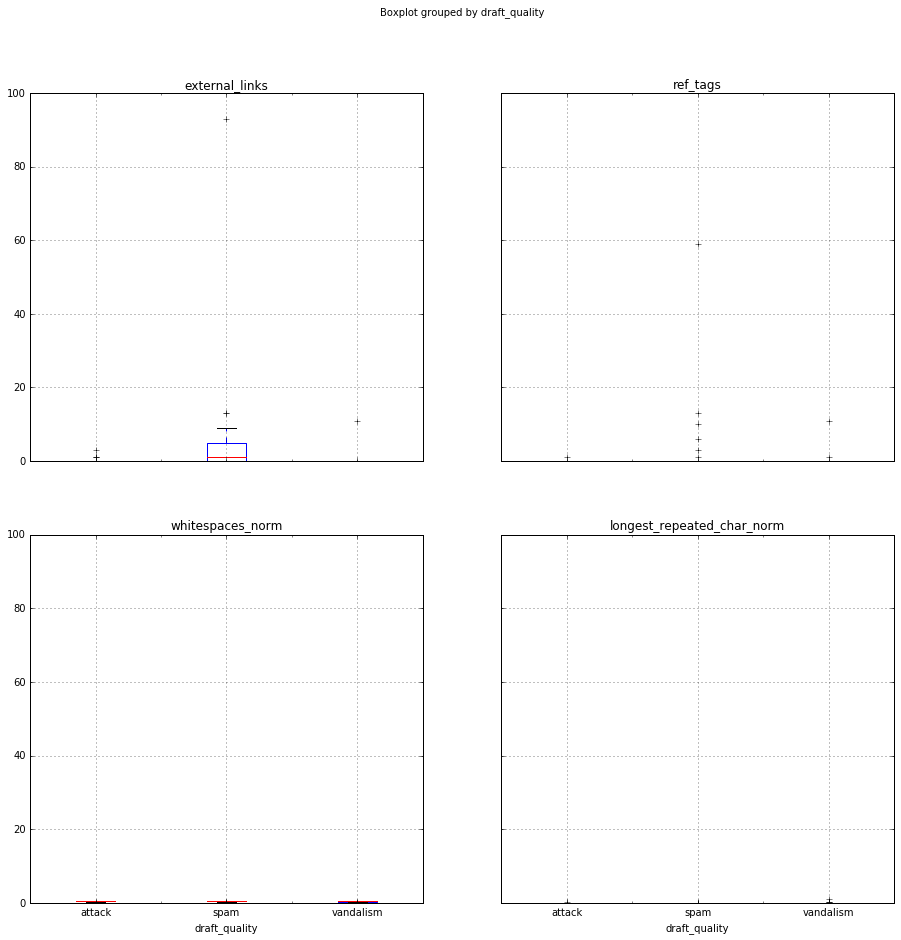

In [20]:
df.boxplot(by='draft_quality', column=['external_links', 'ref_tags', 'whitespaces_norm', 'longest_repeated_char_norm'], figsize=(15,15))

Feature ranking:
1. feature 49 (0.048787)
2. feature 31 (0.045785)
3. feature 42 (0.040480)
4. feature 38 (0.033654)
5. feature 41 (0.033084)
6. feature 12 (0.033045)
7. feature 8 (0.032515)
8. feature 24 (0.031702)
9. feature 22 (0.031495)
10. feature 35 (0.030968)
11. feature 20 (0.029690)
12. feature 7 (0.028881)
13. feature 46 (0.028815)
14. feature 40 (0.028371)
15. feature 36 (0.027828)
16. feature 23 (0.027645)
17. feature 0 (0.027449)
18. feature 19 (0.026808)
19. feature 6 (0.026189)
20. feature 13 (0.025778)
21. feature 47 (0.025613)
22. feature 51 (0.025340)
23. feature 11 (0.024404)
24. feature 48 (0.023871)
25. feature 18 (0.023631)
26. feature 10 (0.023285)
27. feature 1 (0.023002)
28. feature 37 (0.021291)
29. feature 17 (0.020924)
30. feature 32 (0.020282)
31. feature 28 (0.019252)
32. feature 5 (0.018532)
33. feature 26 (0.018427)
34. feature 43 (0.017161)
35. feature 14 (0.014858)
36. feature 2 (0.011967)
37. feature 29 (0.009797)
38. feature 27 (0.008311)
39. feature

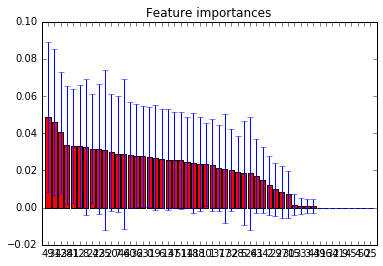

In [21]:

X = df[features]
y = df[target]
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [22]:
forest.score(X,y)

1.0

### Univariate Selection

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
modelKbest = SelectKBest(chi2, k=6)
fit=modelKbest.fit(df[features], df[target])
newFeatures = fit.transform(df[features])
print(fit.scores_)
#print(newFeatures[0:5,:])
print(fit.get_support())
features[fit.get_support()]

[  1.21181914e+04   3.43480387e+02   1.66958687e+03   5.30000000e+02
              nan   1.69586631e+04   4.24289131e+03   5.75900990e+02
   4.58051635e+01              nan   2.86614173e+00   1.75225663e+03
   1.27789474e+02   2.86531485e+02   9.43257957e+02   5.30000000e+02
              nan   2.47869565e+02   4.95796198e+02   1.35363344e+02
   3.68792373e+01              nan   1.26442403e+03   1.47293869e+01
   2.54033536e+03              nan   2.59559322e+02   4.69588629e+02
   1.17694444e+02   1.40971429e+02   9.92352941e+01   5.60449245e-02
   7.10438701e-01   4.66960352e-01              nan   1.66404708e+00
   2.59905456e-02   2.20812921e-01   1.87301396e-01              nan
   1.83804595e+00   9.40823038e-02   1.61861986e-01   5.91254042e-01
   9.05982906e-01              nan   1.17471543e-01   4.18547839e-02
   2.82942520e-01   8.80110451e-02              nan   3.88146133e-01]
[ True False  True False False  True  True False False False False  True
 False False False False Fals

/root/.local/lib/python3.4/site-packages/sklearn/feature_selection/univariate_selection.py:165: RuntimeWarning: invalid value encountered in true_divide
  chisq /= f_exp


Index(['chars', 'markup_chars', 'url_chars', 'word_chars', 'tokens',
       'content_chars'],
      dtype='object')

### PCA

In [28]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
newf=preprocessing.scale(df[features]) #normalisation
pca = PCA(n_components=10)
pca.fit(newf)
print(pca.explained_variance_ratio_)

[ 0.31947328  0.13826693  0.10669993  0.09154999  0.07189913  0.058532
  0.04216894  0.03833435  0.02857489  0.02313594]
